## Exemple sur quelques utilitaires pour la préparation de données:
#Rapport sur la qualité des données, remplacement et comptage de valeurs manquantes, visualisation de valeurs aberrantes, normalisation, discrétisation
#...


In [1]:
#importation du jeu données. dataset
import pandas as pd
df = pd.read_csv("FraudeAssuranceAuto.csv")
#pour formater l'affichage
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.00,1.00,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.00,0.00,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.00,0.00,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.00,0.00,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.00,0.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       500 non-null    int64  
 1   Insurance Type           500 non-null    object 
 2   Income of Policy Holder  500 non-null    int64  
 3   Marital Status           170 non-null    object 
 4   Num Claimants            500 non-null    int64  
 5   Injury Type              500 non-null    object 
 6   Overnight Hospital Stay  500 non-null    object 
 7   Claim Amount             500 non-null    int64  
 8   Total Claimed            500 non-null    int64  
 9   Num Claims               500 non-null    int64  
 10  Num Soft Tissue          490 non-null    float64
 11  % Soft Tissue            500 non-null    float64
 12  Claim Amount Received    500 non-null    int64  
 13  Fraud Flag               500 non-null    int64  
dtypes: float64(2), int64(8), o

In [4]:
#visualistion du rapport sur la qualité de données
df.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.00,500.00,500.00,500.00,500.00,500.00,490.00,500.00,500.00,500.00
mean,250.50,13739.99,1.91,16373.20,9597.19,0.80,0.23,0.17,13051.94,0.34
std,144.48,20081.54,1.01,29426.28,35655.69,2.67,0.59,0.43,30547.19,0.47
min,1.00,0.00,1.00,-99999.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,125.75,0.00,1.00,3322.25,0.00,0.00,0.00,0.00,0.00,0.00
50%,250.50,0.00,2.00,5663.00,0.00,0.00,0.00,0.00,3253.50,0.00
75%,375.25,33918.50,3.00,12245.50,11282.75,1.00,0.00,0.00,8191.75,1.00
max,500.00,71284.00,4.00,270200.00,729792.00,56.00,5.00,2.00,295303.00,1.00


In [5]:
import numpy as np
#lecture uniquement des variables de type numérique
df.describe(include=np.number)

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.00,500.00,500.00,500.00,500.00,500.00,490.00,500.00,500.00,500.00
mean,250.50,13739.99,1.91,16373.20,9597.19,0.80,0.23,0.17,13051.94,0.34
std,144.48,20081.54,1.01,29426.28,35655.69,2.67,0.59,0.43,30547.19,0.47
min,1.00,0.00,1.00,-99999.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,125.75,0.00,1.00,3322.25,0.00,0.00,0.00,0.00,0.00,0.00
50%,250.50,0.00,2.00,5663.00,0.00,0.00,0.00,0.00,3253.50,0.00
75%,375.25,33918.50,3.00,12245.50,11282.75,1.00,0.00,0.00,8191.75,1.00
max,500.00,71284.00,4.00,270200.00,729792.00,56.00,5.00,2.00,295303.00,1.00


In [5]:
#les variables qualitatives de type object
df.describe(include=['O'])

,Insurance Type,Marital Status,Injury Type,Overnight Hospital Stay
count,500,170,500,500
unique,1,3,4,2
top,CI,Married,Broken Limb,No
freq,500,99,177,354


In [6]:
#trouver le pourcentae de valeurs manquantes dans chaque variable
round((df.isnull().sum())/len(df),2)

ID                        0.00
Insurance Type            0.00
Income of Policy Holder   0.00
Marital Status            0.66
Num Claimants             0.00
Injury Type               0.00
Overnight Hospital Stay   0.00
Claim Amount              0.00
Total Claimed             0.00
Num Claims                0.00
Num Soft Tissue           0.02
% Soft Tissue             0.00
Claim Amount Received     0.00
Fraud Flag                0.00
dtype: float64

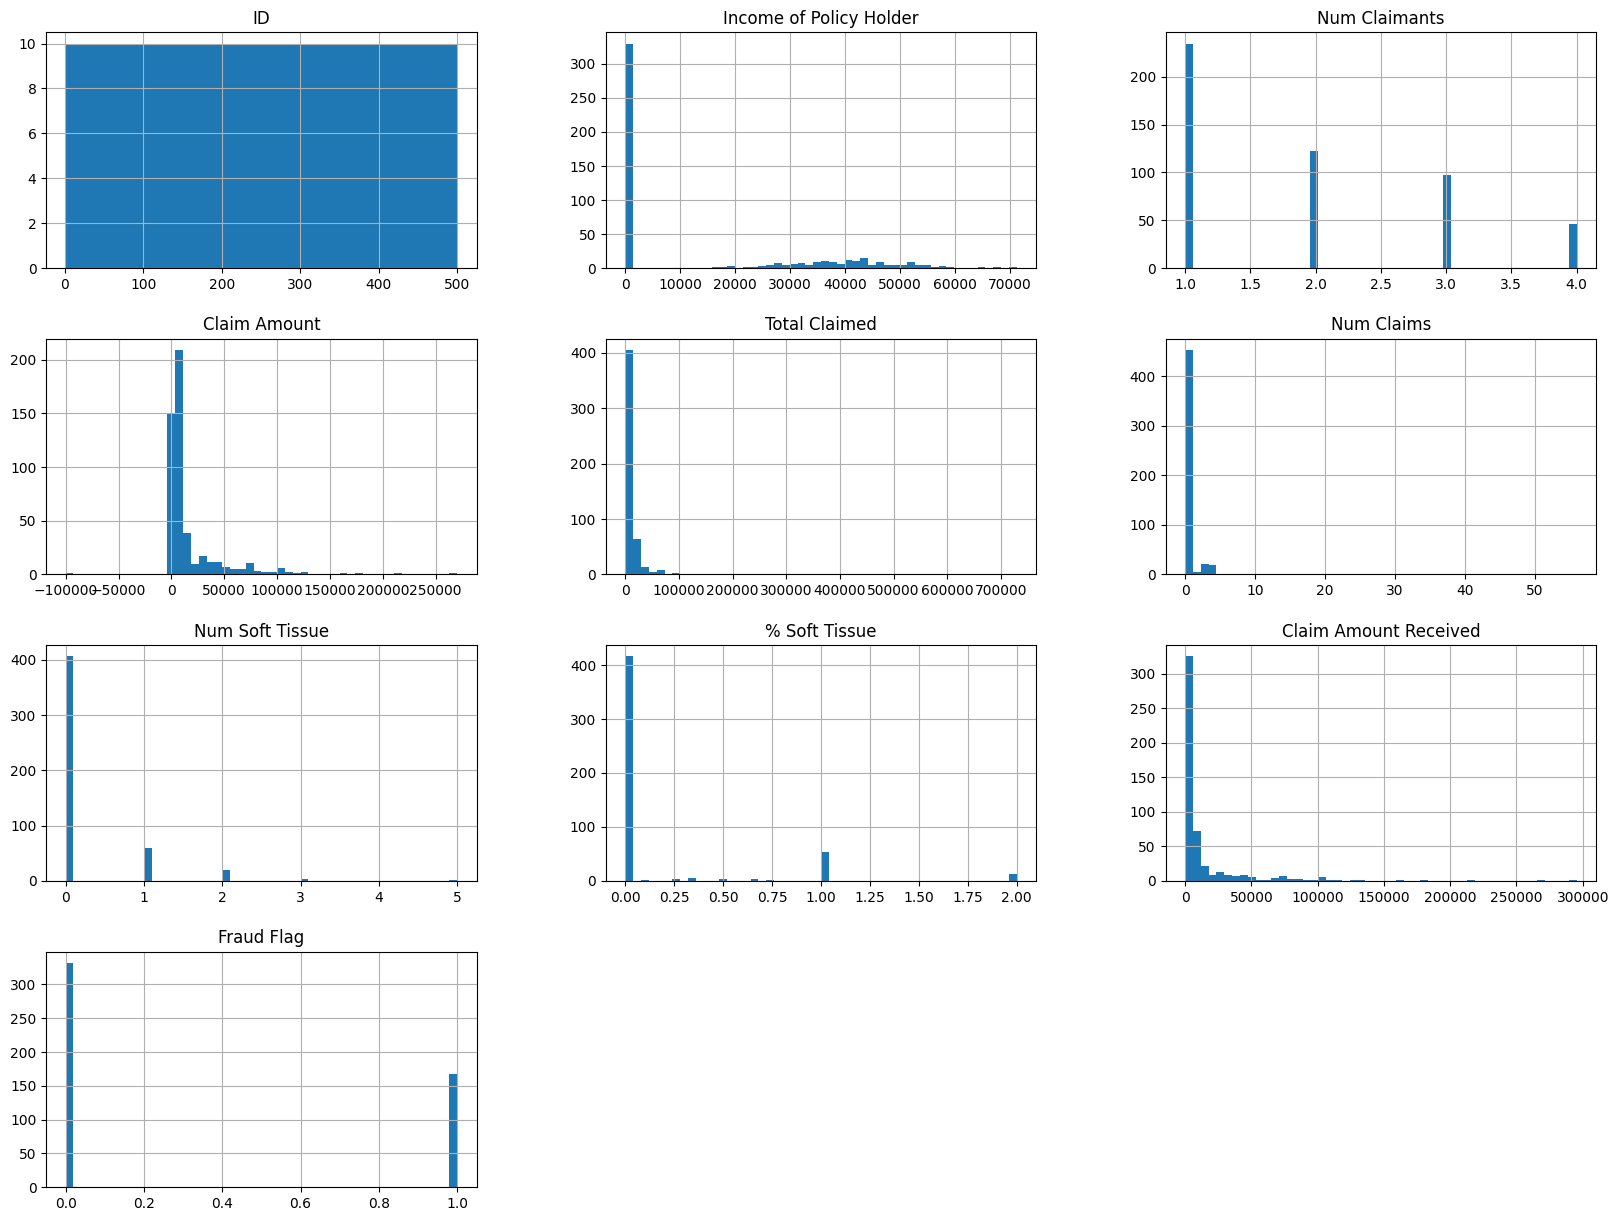

In [8]:
#visualisation du TBA
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#extraire que les varaibles_numériques
#faire un drop des caractéristiques de type objet et la varaible cible
v_cat = ['Insurance Type ','Marital Status','Injury Type','Overnight Hospital Stay', 'Fraud Flag']
df_num = df.drop(columns=v_cat, axis=1)

In [10]:
#remplacement des valeurs manquantes pour les variables de type numérique.
#importation de l'utilitaire d'imputation
from sklearn.impute import SimpleImputer
#de chaque caractéristique. la stratégie de remplacement est la moyenne
imp = SimpleImputer(strategy='median')
#mantenant on peut appliquer l'instance SimpleImputer 
#au jeu de données -TBA- d'entrainement  en utilisant la méthode fit():
imp.fit(df_num)
X_num= imp.transform(df_num)
df_fraude_aa_num=pd.DataFrame(X_num, columns=df_num.columns)
df_fraude_aa_num.head(5)

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,1.00,0.00,2.00,1625.00,3250.00,2.00,2.00,1.00,0.00
1,2.00,0.00,2.00,15028.00,60112.00,1.00,0.00,0.00,15028.00
2,3.00,54613.00,1.00,-99999.00,0.00,0.00,0.00,0.00,572.00
3,4.00,0.00,3.00,270200.00,0.00,0.00,0.00,0.00,270200.00
4,5.00,0.00,4.00,8869.00,0.00,0.00,0.00,0.00,0.00


In [11]:
df_fraude_aa_num
#faire une copie du data numérique
df_num_cp = df_fraude_aa_num.copy()

In [12]:
#vérification de l'opération de remplacement
round((df_fraude_aa_num.isnull().sum())/len(df_fraude_aa_num),2)

ID                        0.00
Income of Policy Holder   0.00
Num Claimants             0.00
Claim Amount              0.00
Total Claimed             0.00
Num Claims                0.00
Num Soft Tissue           0.00
% Soft Tissue             0.00
Claim Amount Received     0.00
dtype: float64

In [11]:
#la caractéristique ID ne joue aucun role, nous allons la dropper
X = df_fraude_aa_num.drop(['ID'], axis=1)
#visulaisation pour quelques caractéristiques suspectes
#Z=X.iloc[:,2:3]

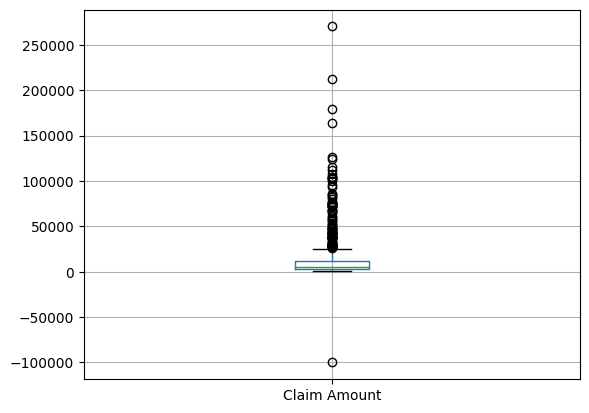

In [12]:
#visulaisation de valeurs aberrantes.
%matplotlib inline 
import matplotlib.pyplot as plt
box_plots = X.boxplot(column=['Claim Amount'])
plt.show()

In [33]:
#matrice de correlation
corr_matrix = X.corr()

In [34]:
corr_matrix

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
Income of Policy Holder,1.00,-0.06,0.01,-0.04,-0.05,-0.01,0.02,0.02
Num Claimants,-0.06,1.00,0.01,0.03,0.05,0.06,0.04,0.00
Claim Amount,0.01,0.01,1.00,-0.01,-0.02,0.01,0.02,0.80
Total Claimed,-0.04,0.03,-0.01,1.00,0.95,0.42,0.06,0.02
Num Claims,-0.05,0.05,-0.02,0.95,1.00,0.49,0.08,-0.00
Num Soft Tissue,-0.01,0.06,0.01,0.42,0.49,1.00,0.82,0.04
% Soft Tissue,0.02,0.04,0.02,0.06,0.08,0.82,1.00,0.08
Claim Amount Received,0.02,0.00,0.80,0.02,-0.00,0.04,0.08,1.00


In [14]:
#la standardisation des données
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm.fit(X)
Xs=norm.transform(X)
#Xs = StandardScaler().fit_transform(X)

In [30]:
pd.options.display.float_format = '{:.2f}'.format # pour formater l'affi.
df_std = pd.DataFrame(Xs, columns=X.columns)
df_std.head(10)

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,-0.68,0.09,-0.50,-0.18,0.45,3.03,1.94,-0.43
1,-0.68,0.09,-0.05,1.42,0.08,-0.40,-0.40,0.06
2,2.04,-0.90,-3.96,-0.27,-0.30,-0.40,-0.40,-0.41
3,-0.68,1.08,8.63,-0.27,-0.30,-0.40,-0.40,8.43
4,-0.68,2.07,-0.26,-0.27,-0.30,-0.40,-0.40,-0.43
5,-0.68,-0.90,0.04,-0.27,-0.30,-0.40,-0.40,0.15
6,1.94,1.08,-0.45,0.24,0.45,1.31,0.77,-0.43
7,-0.68,0.09,-0.30,-0.27,-0.30,-0.40,-0.40,-0.18
8,-0.68,-0.90,-0.49,-0.27,-0.30,0.00,-0.40,-0.36
9,1.42,2.07,-0.48,-0.27,-0.30,-0.40,-0.40,-0.35


In [36]:
#discrétisation 
#importationn de la classe KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer


In [37]:
#l'option n_bins : nombre de bins
#l'option encode pour envoyer le type de résultat. ici ca sera les numéros de bins
#pour juste voir est-ce que les données sont bien réparties en 3 calsse: 0, 1, 2
#stratey : uniform . les bins auront la même largeur
data = df_num_cp.iloc[:,:]
discret = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discret.fit(data)


/Users/abouzoua/Desktop/enseignement/8INF867/v8inf867/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [38]:
data

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,1.00,0.00,2.00,1625.00,3250.00,2.00,2.00,1.00,0.00
1,2.00,0.00,2.00,15028.00,60112.00,1.00,0.00,0.00,15028.00
2,3.00,54613.00,1.00,-99999.00,0.00,0.00,0.00,0.00,572.00
3,4.00,0.00,3.00,270200.00,0.00,0.00,0.00,0.00,270200.00
4,5.00,0.00,4.00,8869.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
495,496.00,0.00,1.00,2118.00,0.00,0.00,0.00,0.00,0.00
496,497.00,29280.00,4.00,3199.00,0.00,0.00,0.23,0.00,0.00
497,498.00,0.00,1.00,32469.00,0.00,0.00,0.00,0.00,16763.00
498,499.00,46683.00,1.00,179448.00,0.00,0.00,0.00,0.00,179448.00


In [39]:
df_nouv= discret.transform(data)

In [40]:
df_nouv

array([[0., 0., 3., ..., 4., 5., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 7., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [9., 6., 0., ..., 0., 0., 6.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [41]:
#on constate que toutes les valeurs des caractéristiques de df_nouv 
# sont toutes réparties en plusieurs modalités (bins): 0, 1,..10.
#chaque valeur est répartie dans une des classes.
pd.options.display.float_format = '{:.2f}'.format # pour formater l'affi.
df = pd.DataFrame(df_nouv, columns=df_num_cp.columns)
df.head()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,0.00,0.00,3.00,2.00,0.00,0.00,4.00,5.00,0.00
1,0.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00
2,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,6.00,9.00,0.00,0.00,0.00,0.00,9.00
4,0.00,0.00,9.00,2.00,0.00,0.00,0.00,0.00,0.00


In [42]:
#on peut aussi normaliser en utilisant la méthode mini-max
#importation de la classe MinMaxScaler. Par défaut le rane est [0,1]
from sklearn.preprocessing import MinMaxScaler


In [43]:
#instanciation de la classe
norm = MinMaxScaler()
data = df_num_cp.iloc[:,:]
norm.fit(data)

MinMaxScaler()

In [44]:
df_nouv= norm.transform(data)

In [45]:
pd.options.display.float_format = '{:.2f}'.format # pour formater l'affi.
df = pd.DataFrame(df_nouv, columns=df_num_cp.columns)
df.head()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,0.00,0.00,0.33,0.27,0.00,0.04,0.40,0.50,0.00
1,0.00,0.00,0.33,0.31,0.08,0.02,0.00,0.00,0.05
2,0.00,0.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.01,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.91
4,0.01,0.00,1.00,0.29,0.00,0.00,0.00,0.00,0.00


In [46]:
#toutes les données sont normalisées.